In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [4]:
# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Shape check
print(f"Training set: {X_train.shape}, Training labels: {y_train.shape}")
print(f"Test set: {X_test.shape}, Test labels: {y_test.shape}")


Training set: (60000, 28, 28), Training labels: (60000,)
Test set: (10000, 28, 28), Test labels: (10000,)


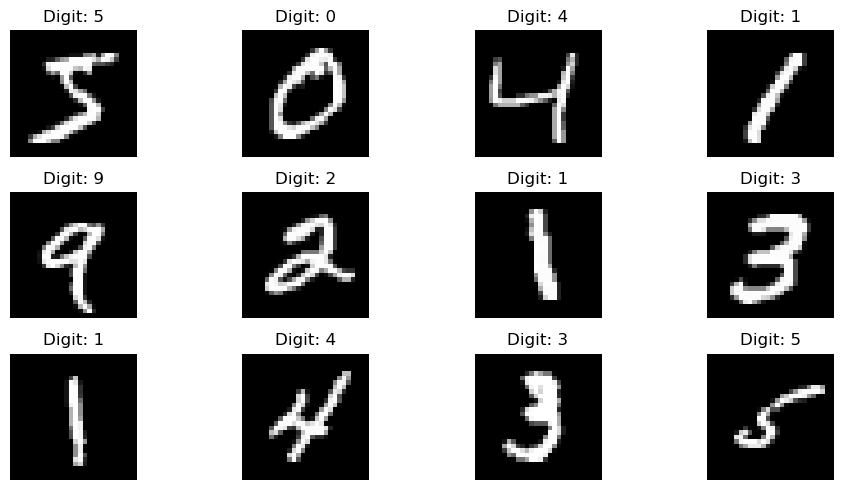

In [5]:
# Display first 12 digits
plt.figure(figsize=(10,5))
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Digit: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [6]:
# Normalize pixel values (0 to 1)
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape to (28, 28, 1) for CNN input
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


In [7]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())  # Converts 3D output to 1D
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))  # 10 digits

model.summary()


c:\Users\mayan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [9]:
history = model.fit(X_train, y_train_cat, 
                    validation_data=(X_test, y_test_cat),
                    epochs=10,
                    batch_size=128,
                    verbose=1)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 16s 30ms/step - accuracy: 0.9240 - loss: 0.2507 - val_accuracy: 0.9818 - val_loss: 0.0578
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9778 - loss: 0.0740 - val_accuracy: 0.9875 - val_loss: 0.0370
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9834 - loss: 0.0531 - val_accuracy: 0.9878 - val_loss: 0.0323
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9867 - loss: 0.0426 - val_accuracy: 0.9894 - val_loss: 0.0313
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9893 - loss: 0.0350 - val_accuracy: 0.9916 - val_loss: 0.0258
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9905 - loss: 0.0308 - val_accuracy: 0.9905 - val_loss: 0.0234
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9913 - loss: 0.0273 - val_accuracy: 0.9925 - val_loss: 0.0230
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9930 - loss: 0.0224 - 

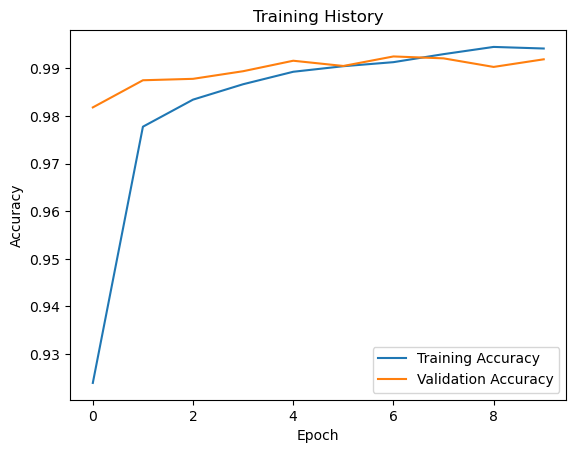

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training History')
plt.legend()
plt.show()


In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test accuracy: {test_acc * 100:.2f}%")


Test accuracy: 99.19%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


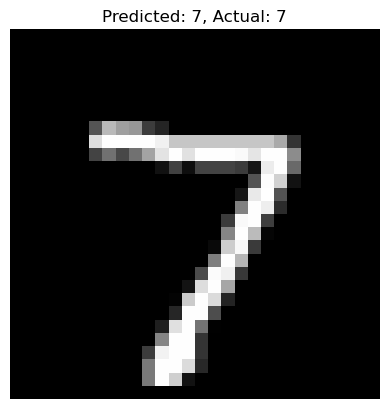

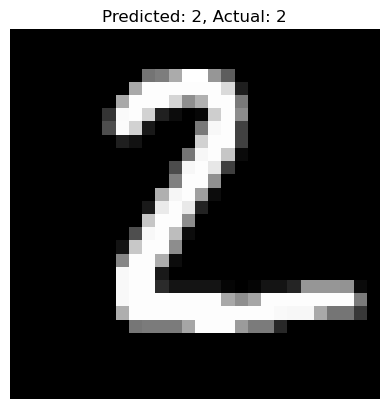

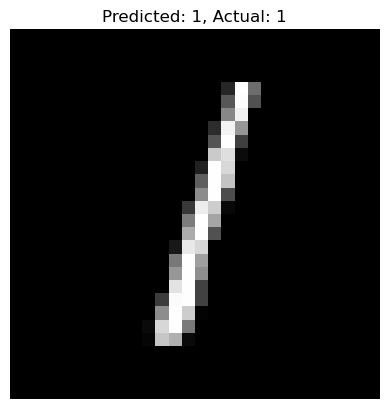

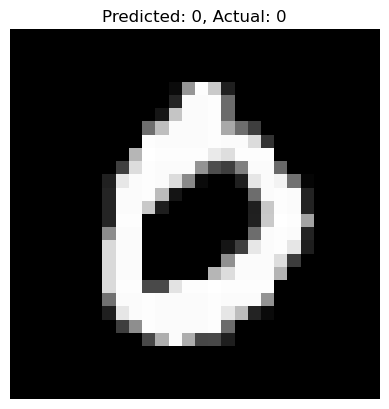

In [19]:
# Predict some digits
predictions = model.predict(X_test[:4])

for i in range(4):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {y_test[i]}")
    plt.axis('off')
    plt.show()


In [21]:
model.save("digit_recognition_cnn.h5")

In [25]:
from PIL import Image
img = Image.fromarray((X_test[1].reshape(28, 28) * 255).astype(np.uint8))
img.save("test_digit_0.png")
